In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Cleaning

### Content Data set

In [2]:
# Load Content data set

content = pd.read_csv(r"C:\Users\user\Downloads\Content.csv")

In [3]:
# Explore data set

content.shape

(1000, 6)

In [4]:
# View first 5 columns

content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [5]:
# View columns

content.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Category', 'URL'], dtype='object')

In [6]:
# Check value counts for columns
# Content Id

content['Content ID'].value_counts()

# Column is unique hence can be used as index or merging column or dropped
# if User ID takes precedence

Content ID
97522e57-d9ab-4bd6-97bf-c24d952602d2    1
d0c1d7f4-7735-49a9-ab6b-2cdb2338a609    1
22cdf77b-00c8-41c3-ad59-333c3e751e2c    1
28b8c278-a125-4295-98dd-5f8d45c3200b    1
e1792fe6-28e0-49fc-8b01-0e027461d8b5    1
                                       ..
16fb5dcb-4349-4831-acf2-8c116ad7dae5    1
0d5eb9fd-879d-4716-aebc-840f7b1b7e9f    1
e4827a5c-c604-4aad-b7ed-b396b3601b74    1
abecd821-ad3d-43b0-a550-aadd9d267072    1
75d6b589-7fae-4a6d-b0d0-752845150e56    1
Name: count, Length: 1000, dtype: int64

In [7]:
# Type column

content['Type'].value_counts()

Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [8]:
# Category column

content['Category'].value_counts()

# Category types are dirty. Will need cleaning to ensure uniformity

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

In [9]:
# Rename Categories for uniformity

content.replace({
        'Studying':'studying', 'healthy eating':'healthy_eating','Science':'science', 
        'public speaking':'public_speaking', 'Animals':'animals',
        '"culture"':'culture', 'Fitness':'fitness', '"studying"':'studying',
       'Veganism':'veganism', '"animals"':'animals', 'Travel':'travel', '"soccer"':'soccer', 
        'Education':'education', '"dogs"':'dogs', 'Technology':'technology', 'Soccer':'soccer', 
        '"tennis"':'tennis', 'Culture':'culture', '"food"':'food','Food':'food', 
        '"technology"':'technology', 'Healthy Eating':'healthy_eating', '"cooking"':'cooking', 
        '"public speaking"':'public_speaking', '"veganism"':'veganism', 
        'Public Speaking':'public_speaking', '"science"':'science'
}, inplace = True)

In [10]:
# View attributes info

content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [11]:
# Remove unnecessary columns

# 1. Unnamed column looks like a duplicate index 
# 2. URL will not be necessary to the analysis. Removal will also clear null values.

content_df = content.drop(['Unnamed: 0','User ID', 'URL'], axis = 1)

In [12]:
# Rename columns to align with Python conventions. Rename Type to content_type for clarity

content_df = content_df.rename(columns={'Content ID':'content_id', 
                                        'Type':'content_type', 'Category':'category'})


### Reactions Data set

In [14]:
# Load Reactions data set

reactions = pd.read_csv(r"C:\Users\user\Downloads\Reactions.csv")


In [15]:
# Explore shape

reactions.shape

(25553, 5)

In [16]:
# Explore first 15 rows

reactions.head(15)


,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58
6,6,97522e57-d9ab-4bd6-97bf-c24d952602d2,7918d465-0953-4f20-9e28-539e74c82e2f,peeking,2020-12-07 06:27:54
7,7,97522e57-d9ab-4bd6-97bf-c24d952602d2,fa3e42f0-71d8-455f-b024-e52d5c27a145,cherish,2021-04-11 17:35:49
8,8,97522e57-d9ab-4bd6-97bf-c24d952602d2,b0c22f82-b882-4394-bf27-6dfadf26e5c2,hate,2021-01-27 08:32:09
9,9,97522e57-d9ab-4bd6-97bf-c24d952602d2,1932a904-86ba-4438-bb52-b7e6516a4019,peeking,2021-04-01 22:54:23


In [17]:
# Explore attributes

reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [18]:
# Check Type values

reactions.Type.value_counts()

Type
heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: count, dtype: int64

In [19]:
# Drop null values on Type column. Nulls on User ID will be dropped with the column

reactions.dropna(subset= ['Type'], how='any', ignore_index=True, inplace=True)


In [20]:
# Drop unnecessary column

reactions_df = reactions.drop(['Unnamed: 0', 'User ID'], axis=1)

In [21]:
# Rename columns

reactions_df.rename(columns={'Content ID':'content_id', 'Type':'reaction_type', 
                             'Datetime':'datetime'}, inplace=True)

### Reaction Types Data set

In [23]:
# Load Reaction Types data set

reaction_types = pd.read_csv(r"C:\Users\user\Downloads\ReactionTypes.csv")

In [24]:
# Explore data set

reaction_types.shape

(16, 4)

In [25]:
# Explore rows and columns

reaction_types



,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [26]:
# Check nulls and data types

reaction_types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  16 non-null     int64 
 1   Type        16 non-null     object
 2   Sentiment   16 non-null     object
 3   Score       16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 644.0+ bytes


In [27]:
# Drop unnecessary columns

reaction_types_df = reaction_types.drop('Unnamed: 0', axis=1)

In [28]:
# Rename columns

reaction_types_df.rename(columns={'Type':'reaction_type', 'Sentiment':'sentiment', 
                                  'Score':'score'},inplace = True)

## Merge Data sets

In [30]:
# Merge reactions_df to content_df

reactions_content_merged = pd.merge(reactions_df, content_df, how='left', on='content_id')

In [31]:
# Merged reactions_content_merged df to reaction_types_df df

full_dataset = pd.merge(reactions_content_merged, reaction_types_df, how='left', on='reaction_type')

In [32]:
full_dataset

,content_id,reaction_type,datetime,content_type,category,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


In [33]:
# Check for null values after merging

full_dataset.isnull().sum()

content_id       0
reaction_type    0
datetime         0
content_type     0
category         0
sentiment        0
score            0
dtype: int64

In [35]:
# Obtain top 5 categories 
top_5_categories = full_dataset.groupby('category').agg(
    total_score =('score', 'sum')).reset_index().sort_values(by='total_score',
                                                            ascending=False).head(5)



In [36]:
top_5_categories

,category,total_score
0,animals,74965
9,science,71168
7,healthy_eating,69339
12,technology,68738
6,food,66676


## Analysis

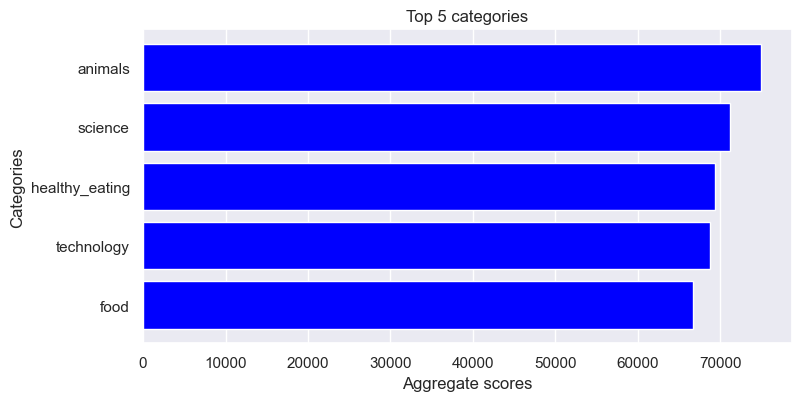

In [46]:
# Bar chart of Top 5 categories

fig1, ax = plt.subplots(figsize=(8,4))

ax.barh('category', 'total_score', data=top_5_categories.sort_values(by="total_score"), 
        label='category', color=['blue'])
ax.set_title("Top 5 categories")
ax.set_ylabel("Categories")
ax.set_xlabel("Aggregate scores")

plt.grid(axis='y')
plt.tight_layout()
plt.show()

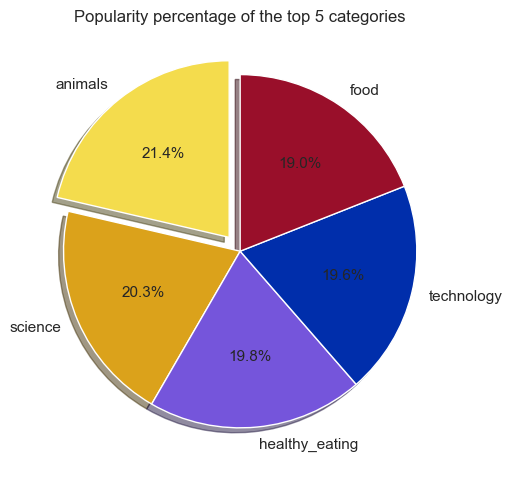

In [98]:
# Percentages of each category in the top five categories

fig2, ax = plt.subplots()

scores = [score for score in top_5_categories['total_score']]
categories = [category for category in top_5_categories['category']]
explode = [0.1, 0, 0, 0, 0]
colors =['#f4dc4d', '#dba21b', '#7555db', '#002eab', '#990f2a']


ax.pie(scores, labels=categories, autopct='%1.1f%%', 
       startangle =90, explode=explode, colors =colors,
       textprops ={'fontsize':11}, shadow=True)

ax.set_title("Popularity percentage of the top 5 categories")

plt.tight_layout()
plt.show()

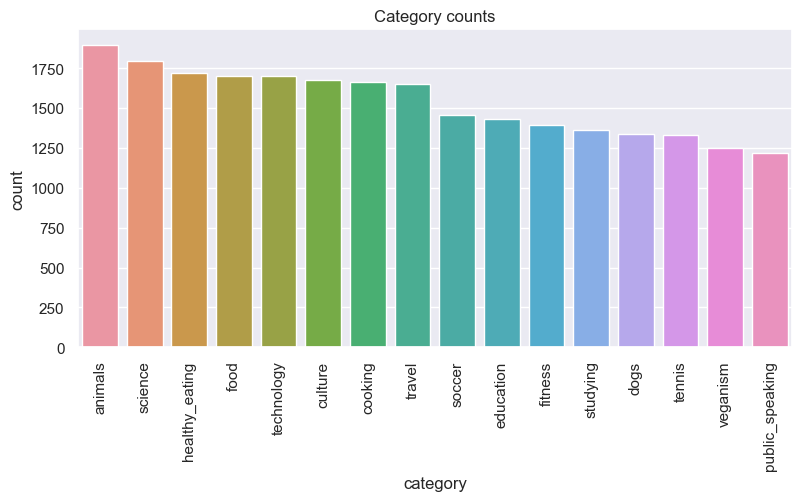

In [96]:
# Plot categories count 

fig3,ax=plt.subplots(figsize=(8,5))

sns.countplot(x='category', data = full_dataset,
              order = full_dataset['category'].value_counts().index)
sns.set(rc={'font.size':6})
plt.xticks(rotation=90)
ax.set_title("Category counts")

plt.tight_layout()
plt.show()

In [42]:
# Reactions to the most popular category.

print(full_dataset.loc[full_dataset['category']=='animals']['reaction_type'].count())



1897


In [43]:
# Month with the most posts

# Extract month form datetime column

full_dataset['month'] = pd.to_datetime(full_dataset['datetime']).dt.strftime('%b')

# Group count of content_id according to month

month_posts = full_dataset.groupby('month').agg(
    posts = ('content_id', 'count')
).reset_index().sort_values(by='posts', ascending=False)

print(month_posts)

   month  posts
8    May   2138
4    Jan   2126
1    Aug   2114
2    Dec   2092
5    Jul   2070
10   Oct   2056
9    Nov   2034
11   Sep   2022
6    Jun   2021
7    Mar   2012
0    Apr   1974
3    Feb   1914


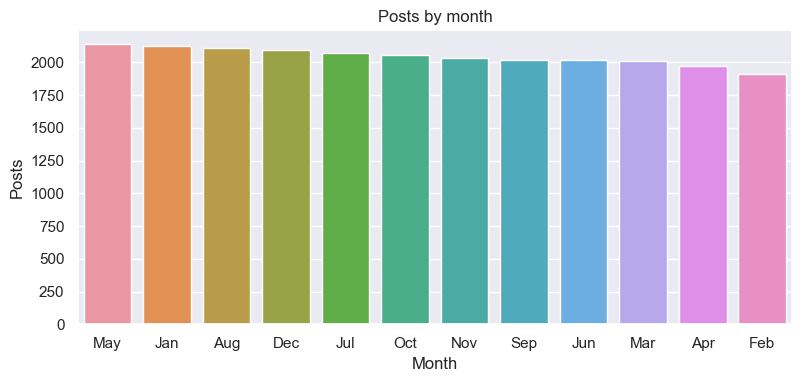

In [44]:
# Countplot of posts per month

fig4, ax = plt.subplots(figsize=(8,3.8))

sns.countplot(x='month', data=full_dataset,
             order = full_dataset['month'].value_counts().index)
ax.set_title("Posts by month")
ax.set_xlabel("Month")
ax.set_ylabel('Posts')

plt.tight_layout()
plt.show()